In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
olivetti = fetch_olivetti_faces()
data = olivetti.data
target = olivetti.target

In [3]:
pca = PCA(n_components=0.99)

In [4]:
data = pca.fit_transform(data)

In [5]:
pca.n_components_

260

In [6]:
gm1= GaussianMixture(n_components=260, n_init =10, random_state=4).fit(data)
labels1 = gm1.predict(data)

C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

In [7]:
gm2= GaussianMixture(n_components=260, covariance_type='tied', n_init =10, random_state=42).fit(data)
labels2 = gm2.predict(data)

C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

In [8]:
gm3 = GaussianMixture(n_components=260, covariance_type='diag',  n_init =10, random_state=42, reg_covar=(1e-3)).fit(data)
labels3 = gm3.predict(data)

C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

In [9]:
gm4 = GaussianMixture(n_components=260, covariance_type='spherical',  n_init =10, random_state=42).fit(data)
labels4 = gm3.predict(data)

C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

In [10]:
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

In [11]:
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(data[:,2:4])

C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

In [12]:
colors = ['red', 'blue', 'green']
markers = ['+','*','x']

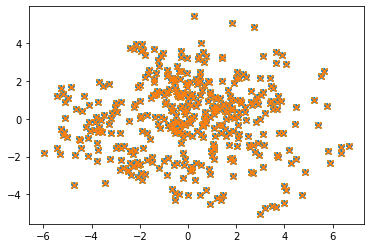

In [13]:
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        plt.scatter(data[:, 2], data[:, 3],marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]

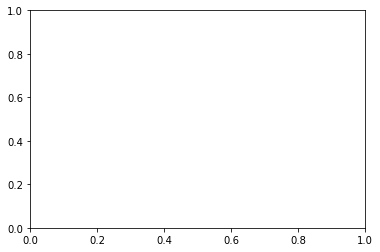

In [14]:
pos = estimator.means_[n]
plot_cov_ellipse(cov,pos,col=color)

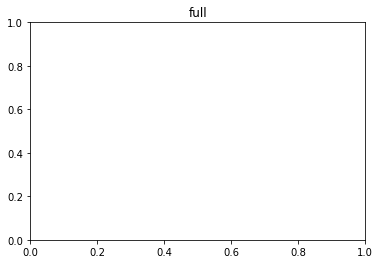

In [15]:
plt.title(name)
plt.show()

In [16]:
print(gm1.bic(data))
print(gm1.aic(data))
print(gm1.score(data))

52026733.755429216
16543975.021049818
1544.1787236877274


In [17]:
print(gm2.score(data))
print(gm3.score(data))
print(gm4.score(data))

831.2181148752727
423.9047153747517
722.1225156793007


In [18]:
gms_per_k = [GaussianMixture(n_components=k, n_init=20, random_state=42).fit(data)
             for k in range(1, 20)]

C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

In [19]:
bics = [model.bic(data) for model in gms_per_k]
aics = [model.aic(data) for model in gms_per_k]

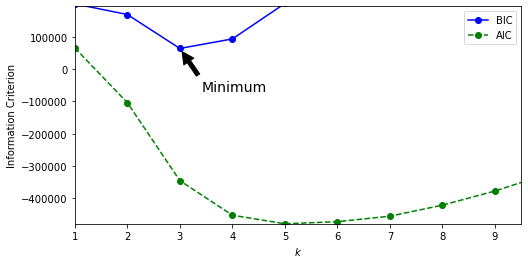

In [20]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 20), bics, "bo-", label="BIC")
plt.plot(range(1, 20), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [21]:
min_bic = np.infty

In [22]:
for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=20,
                              covariance_type=covariance_type,
                              random_state=42).fit(data).bic(data)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dimpl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

In [23]:
print(best_k)
print(best_covariance_type) 

2
diag


In [24]:
print("For instance 1: ")
print("Hard: ",gm1.predict(data))
print("Soft: ",gm1.predict_proba(data))    

For instance 1: 
Hard:  [ 96  36 207 220 121 132 189 144  74  82 228  52 177 216 208 120  25 101
 120 101  50 150 150  84  84 176 154 175  72  72  66 117 151  56  56 193
  56  66 135 197 190  22  22 190  16 139   1 229 139 251  46  46  46  13
  89  13 214 257 214  89 244  70  47 133  39  47  93 145 224 125 230  67
 236 191  34 110 146  34  75  63 165 152 165 138 138 239 239 138  41 223
 142 185 103 103 217 158 119  54 128 171  35 114 114   7 148 114 255  83
 258  35  80 246 173 111  57 226  57 221 153 215   4   4 170 170 155 124
 105 188 178 155 200 205 238 200  28 238 203 233  65 107 222  44 222  11
  44 222  44 186  44  44  45  18  18  77  77 181 126 116  98  18  42 161
  97  97  42  92  92 174 163  64 130 164 168 164 168  69 253 168 196  69
  94  94  94  17  17  31 127 127 127 235  37  37  81  71 198  71 198  33
  33  81 247 112 112 204  38  38   8   8  38   8 160 160 160 240 252 131
  26  53  53  53 183  12 113  91 113  91 113  12 250  15 231 231  55  55
 109 129 129  30  55  55   

In [25]:
print("For instance 2: ")
print("Hard: ",gm2.predict(data))
print("Soft: ",gm2.predict_proba(data))    

For instance 2: 
Hard:  [206  67 124 110 127 113 130 147 181  26 201 224 195 159  84  92 254  10
  92  10  61 145 145  83  83 218 164 163 109 109 133 186  76  11  11 192
  11 133  97 120  68  93  93  68  91  91  68 121 237 248  65  65  65  60
  60  60 131  17 131  60  37 157  40 114 182  40 156 241 143 105 231  80
 239  41  52 217 103  52 151 167  74  74  74 125 125   4   4 125 125 232
 208  45  28  28 215  88 166 193 148 106 225  64  64 229 160  64  36 233
   9 225 223  29 139 202  29  58  29 227 173  90 102 102 116 116 134 188
 249 228 205 134  66 162  35  66 244  35 140 194  35 165  24  39  24 203
  39 203  39 198  39  39 213  30  30  70  70  72 107 183  85  30  49 220
  98 230  49  51  51 123 256 170 255 176 122 176  87 122   1  87   1 122
  62  62  62 179 179  12 179  27  27 235 117 117 117  95  94  95  94  59
 222  56 253  89  89   3   3   3  23  23   3  23  86  86 197 211  25 153
 258  25  25  25 171 128  63 129  63 129  63 128  13 246  18  18  15 137
 158 169 187 187 137 137 10

In [26]:
print("For instance 3: ")
print("Hard: ",gm3.predict(data))
print("Soft: ",gm3.predict_proba(data))    

For instance 3: 
Hard:  [206  67 124 110 127 113 130 147 181  26 201 224 195 159  84  92 254  10
  92  10  61 145 145  83  83 218 164 163 109 109 133 186  76  11  11 192
  11 133  97 120  68  93  93  68  91  91  68 121 237 248  65  65  65  60
  60  60 131  17 131  60  37 157  40 114 182  40 156 241 143 105 231  80
 239  41  52 217 103  52 151 167  74  74  74 125 125   4   4 125 125 232
 208  45  28  28 215  88 166 193 148 106 225  64  64 229 160  64  36 233
   9 225 223  29 139 202  29  58  29 227 173  90 102 102 116 116 134 188
 249 228 205 134  66 162  35  66 244  35 140 194  35 165  24  39  24 203
  39 203  39 198  39  39 213  30  30  70  70  72 107 183  85  30  49 220
  98 230  49  51  51 123 256 170 255 176 122 176  87 122   1  87   1 122
  62  62  62 179 179  12 179  27  27 235 117 117 117  95  94  95  94  59
 222  56 253  89  89   3   3   3  23  23   3  23  86  86 197 211  25 153
 258  25  25  25 171 128  63 129  63 129  63 128  13 246  18  18  15 137
 158 169 187 187 137 137 10

In [27]:
print("For instance 4: ")
print("Hard: ",gm4.predict(data))
print("Soft: ",gm4.predict_proba(data))    

For instance 4: 
Hard:  [113 114 201 182 128 125 185 166 107  68 215 209 150 208 139  67  34  34
  67  34  84 131 131  47  47 193 137 117  66  66  75 153 160  11  11 195
 188  75  95 225 212  92  92 212  25  25   2  25  25  43  44  44  44 133
  20 133  20 254  20  20 247 118 155 142  49 245  94  99  40 143 239  69
 176 141 176 237 108  52  59  61 200  31 200  27  27 258 256  27  27 187
  91 207  23  23  74 211 144 220 149  88 177  60  60  96 124  60  10 244
 232 177   0 259 161 191  37 228  37 109 172 227 158 158 157 157 120 145
 170 180 159 120  56   4  87  56  56  87 129 151 196  87 198  22 198  14
  22 198  22 206  22  22  71  45  45  73  73 190  83 146 116  45  36 202
 248  86  36  39  39 136 138 154  48 126 175 126 175   7 203 175 203   7
  79  79 184  17  17  28  17 192 192 184 152 152  33 100  19 100  19 204
 229  33  42  42  42  78 112 112  55  55 112  55 168  32 210 250  64 162
  64  64  64  64 119  93  82  98  82  98  82  93 233 238 199 199 257  15
  89  26  26  26  15  15 10

In [28]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

In [29]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

In [30]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [31]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


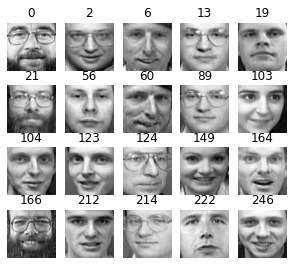

In [32]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm1.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)
plot_faces(gen_faces, y_gen_faces)

In [33]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

In [34]:
n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

In [35]:
n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

In [36]:
X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

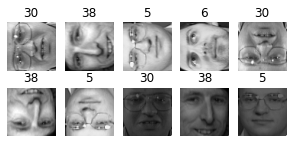

In [37]:
plot_faces(X_bad_faces, y_bad)

In [38]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [39]:
gm3.score_samples(X_bad_faces_pca)

array([-1206.54610008, -1113.59670852, -1826.82363425, -2653.48878181,
       -1299.25191502,  -940.6134871 , -1701.87395508, -1386.66655279,
       -1281.77555359, -1038.17615578])

In [40]:
gm3.score_samples(data[:10])

array([653.09458855, 653.09180776, 653.09313029, 653.09021373,
       653.09367112, 653.09444998, 653.09303945, 653.09312736,
       653.09459686, 653.092465  ])

In [41]:
pca.n_components_

260

In [42]:
print("Convertion:", gm1.converged_)

Convertion: True


In [43]:
print("Iteration:", gm1.n_iter_)

Iteration: 2


In [44]:
print(gm1.bic(data))
print(gm1.aic(data))

52026733.755429216
16543975.021049818


In [45]:
print(gm1.score(data))
print(gm2.score(data))
print(gm3.score(data))
print(gm4.score(data))

1544.1787236877274
831.2181148752727
423.9047153747517
722.1225156793007
